# Demo to run ECmean4 functions within the AQUA framework

We load the AQUA module

In [2]:
from aqua import Reader
import xarray as xr

Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

In [3]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco2559-ng5'
year1 = 2020
year2 = 2020
numproc = 1
interface = '../config/interface_AQUA.yml'
config = '../config/ecmean_config.yml'

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [4]:
# areas false is needed since this is not used by ECmean and can create some issue
reader_atm = Reader(model=model_atm, exp=exp, source="lra-r100-monthly", areas=False)
data_atm = reader_atm.retrieve(fix=False)
# drop atmospheric sea ice
data_atm = data_atm.drop('ci')
data_atm

<xarray.Dataset>
Dimensions:  (time: 13, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
Data variables: (12/19)
    2t       (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(13, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>

In [5]:
# areas false is needed since this is not used by ECmean and can create some issue
reader_oce = Reader(model=model_oce, exp=exp, source="lra-r100-monthly", areas=False)
data_oce = reader_oce.retrieve(fix=False)
data_oce = data_oce.drop(['ocpt','so'])
data_oce

/work/bb1153/b382076/mambaforge/envs/aqua-ecmean/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/work/bb1153/b382076/mambaforge/envs/aqua-ecmean/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[inde

<xarray.Dataset>
Dimensions:  (time: 23, lat: 180, lon: 360, nz1: 69)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20T02:00:00 ... 2020-12-01T02:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * nz1      (nz1) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
Data variables:
    ci       (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    sithick  (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(23, 180, 360), meta=np.ndarray>

We merge the two dataset to feed them into the AQUA tool

In [6]:
data = xr.merge([data_atm, data_oce])
data

<xarray.Dataset>
Dimensions:  (time: 25, lat: 180, lon: 360, plev: 23, nz1: 69)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T02:00:00 ... 2021-01-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
  * nz1      (nz1) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
Data variables: (12/24)
    2t       (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(24, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    ...       ...
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(24, 23, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    sithick  (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>
    zos      (time, lat, lon) float64 dask.array<chunksize=(25, 180, 360), meta=np.ndarray>

*Important*: before proceeding please edit the output directories in `config/config.yaml`

# Performance indices
Basic call to performance indices

In [7]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

2023-07-14 15:13:49 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.3: Running performance_indices!


2023-07-14 15:13:50 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!
2023-07-14 15:13:55 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-07-14 15:13:56 | ecmean |  WARNING -> Preproc in 7.2332 seconds
2023-07-14 15:13:59 | ecmean.performance_indices |  WARNING -> ta: Need to interpolate vertical levels...


PI for Global ALL ta 18.573


2023-07-14 15:13:59 | ecmean.performance_indices |  WARNING -> ta: Need to interpolate vertical levels...


PI for Global DJF ta 7.57


2023-07-14 15:14:00 | ecmean.performance_indices |  WARNING -> ta: Need to interpolate vertical levels...


PI for Global JJA ta 19.342


2023-07-14 15:14:02 | ecmean.performance_indices |  WARNING -> ua: Need to interpolate vertical levels...


PI for Global ALL ua 4.245


2023-07-14 15:14:03 | ecmean.performance_indices |  WARNING -> ua: Need to interpolate vertical levels...


PI for Global DJF ua 2.343


2023-07-14 15:14:03 | ecmean.performance_indices |  WARNING -> ua: Need to interpolate vertical levels...


PI for Global JJA ua 5.245


2023-07-14 15:14:05 | ecmean.performance_indices |  WARNING -> va: Need to interpolate vertical levels...


PI for Global ALL va 3.718


2023-07-14 15:14:06 | ecmean.performance_indices |  WARNING -> va: Need to interpolate vertical levels...


PI for Global DJF va 2.032


2023-07-14 15:14:07 | ecmean.performance_indices |  WARNING -> va: Need to interpolate vertical levels...


PI for Global JJA va 4.612


2023-07-14 15:14:09 | ecmean.performance_indices |  WARNING -> hus: Need to interpolate vertical levels...


PI for Global ALL hus 14.142


2023-07-14 15:14:10 | ecmean.performance_indices |  WARNING -> hus: Need to interpolate vertical levels...


PI for Global DJF hus 14.523


2023-07-14 15:14:10 | ecmean.performance_indices |  WARNING -> hus: Need to interpolate vertical levels...


PI for Global JJA hus 13.446
PI for Global ALL tas 35.959
PI for Global DJF tas 16.163
PI for Global JJA tas 27.218
PI for Global ALL pr 5.444
PI for Global DJF pr 3.438
PI for Global JJA pr 5.181
PI for Global ALL psl 3.573
PI for Global DJF psl 1.785
PI for Global JJA psl 2.83
PI for Global ALL tos 10.906
PI for Global DJF tos 6.727
PI for Global JJA tos 8.588
PI for Global ALL sos 8.029
PI for Global DJF sos 5.891
PI for Global JJA sos 6.789
PI for Global ALL siconc 4.421
PI for Global DJF siconc 1.576
PI for Global JJA siconc 11.312


2023-07-14 15:14:13 | ecmean |  WARNING -> Done in 16.9316 seconds with 1 processors
2023-07-14 15:14:16 | ecmean |  WARNING -> Postproc done in 2.5525 seconds


Open the obtained image file

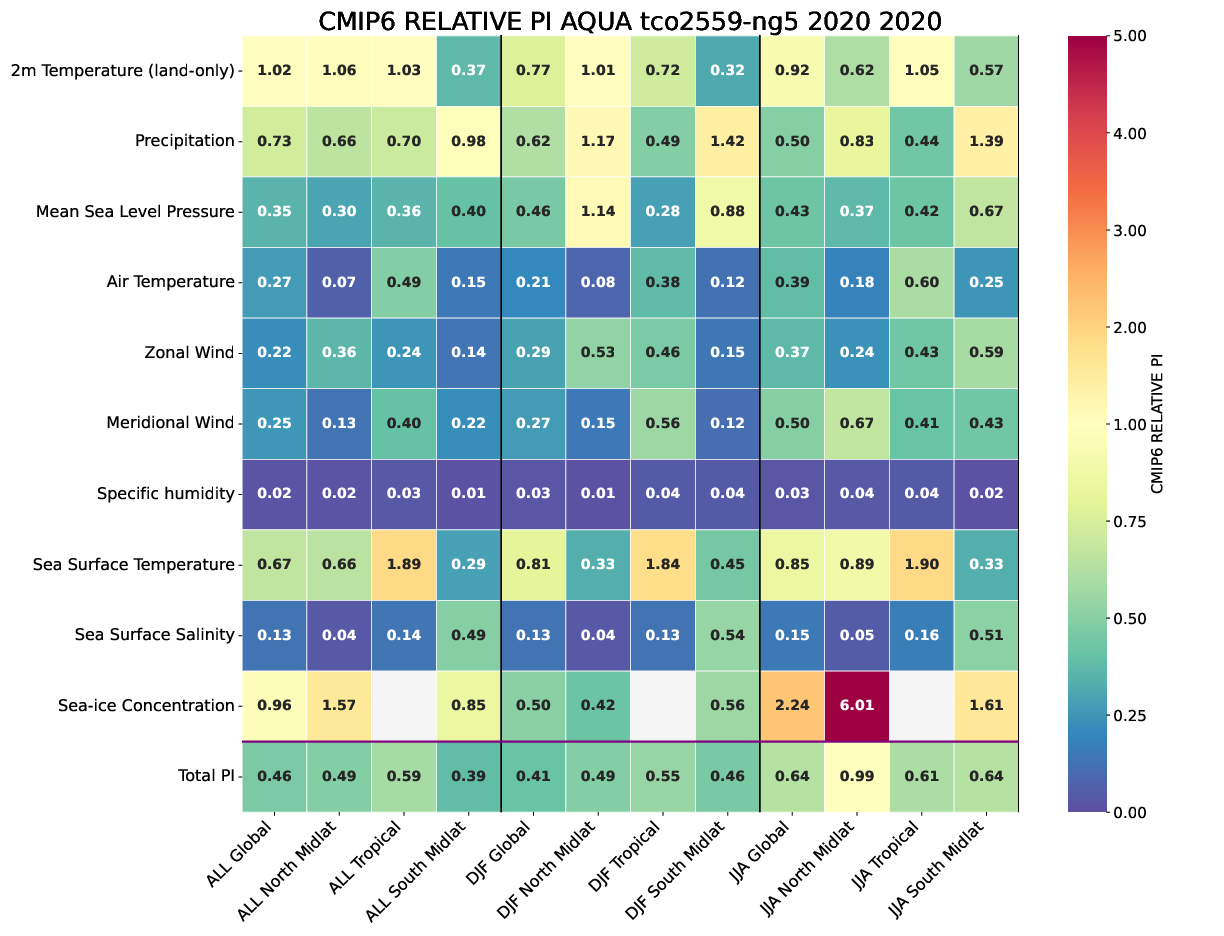

In [9]:
from aqua.util import load_yaml
cfg = load_yaml('../config/ecmean_config.yml')
img = WImage(filename=cfg['dirs']['fig']+f'/PI4_EC23_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img